In [ ]:
import pandas as pd
import json

# Function to safely parse JSON and extract Psum
def extract_psum(row):
    try:
        metrics = json.loads(row)
        return metrics.get('Psum', {}).get('avgvalue', pd.NA)
    except json.JSONDecodeError:
        return pd.NA

# Load the CSV data
df = pd.read_csv('/content/drive/MyDrive/demoPumpDayData.csv')

# Safely extract Psum values
df['Psum'] = df['metrics'].apply(extract_psum)

# Remove rows where Psum couldn't be extracted
df = df.dropna(subset=['Psum'])

# Calculate Operating Load
operating_load = df['Psum'].nlargest(10).mean()

# Step 3: Determine Machine States
def determine_state(psum, operating_load):
    if pd.isna(psum):
        return 'Off'
    elif 0 <= psum <= 0.1:
        return 'On - Unloaded'
    elif psum < 0.2 * operating_load:
        return 'On - Idle'
    else:
        return 'On - Loaded'

# Determine Machine States
df['State'] = df['Psum'].apply(lambda x: determine_state(x, operating_load))
# Convert 'fromts' from Unix timestamp (milliseconds) to datetime
df['fromts'] = pd.to_datetime(df['fromts'], unit='ms')

# Print the first few rows to verify
print(df[['fromts', 'Psum', 'State']].head(20))



# Now, exporting to JSON will include readable datetimes
df[['fromts', 'Psum', 'State']].to_json('Processed_machine_states.json', orient='records', date_format='iso', date_unit='ms')


                fromts        Psum        State
0  2021-01-27 04:38:00  154.985167  On - Loaded
1  2021-01-27 04:39:00  152.503101  On - Loaded
2  2021-01-27 04:40:00  152.646495  On - Loaded
3  2021-01-27 04:41:00  138.447624  On - Loaded
4  2021-01-27 04:42:00  132.982454  On - Loaded
5  2021-01-27 15:59:00  185.894385  On - Loaded
6  2021-01-27 11:07:00  178.626959  On - Loaded
7  2021-01-27 11:11:00  177.298111  On - Loaded
8  2021-01-27 07:28:00   66.742375  On - Loaded
9  2021-01-27 07:29:00   55.811616    On - Idle
10 2021-01-27 07:01:00  148.698468  On - Loaded
11 2021-01-27 07:04:00  149.861315  On - Loaded
12 2021-01-27 08:12:00    1.180117    On - Idle
13 2021-01-27 08:13:00    1.185559    On - Idle
14 2021-01-27 08:14:00    1.180849    On - Idle
15 2021-01-27 08:15:00    1.183152    On - Idle
16 2021-01-27 08:16:00    1.181896    On - Idle
17 2021-01-27 21:43:00  173.272003  On - Loaded
18 2021-01-27 21:45:00  163.895231  On - Loaded
19 2021-01-27 21:46:00  157.054741  On -

In [ ]:
print(df['State'])

0       On - Loaded
1       On - Loaded
2       On - Loaded
3       On - Loaded
4       On - Loaded
           ...     
1429    On - Loaded
1430    On - Loaded
1431    On - Loaded
1432    On - Loaded
1433    On - Loaded
Name: State, Length: 1434, dtype: object


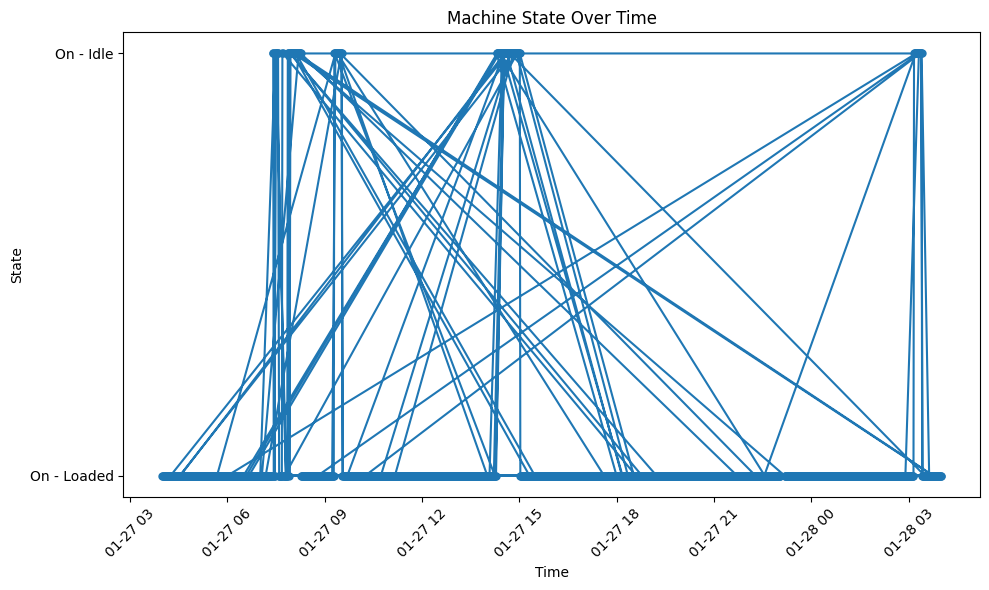

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'fromts' is converted to a datetime format suitable for plotting
df['fromts'] = pd.to_datetime(df['fromts'], unit='ms')

plt.figure(figsize=(10, 6))
plt.plot(df['fromts'], df['State'], marker='o', linestyle='-', markersize=5)
plt.title('Machine State Over Time')
plt.xlabel('Time')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
